# 

title: Water Rights Restored to the Gila River

subtitle: The impacts of irrigation on vegetation health in the Gila
River Valley

author:

-   Elsa Culler

-   Nate Quarderer

date: last-modified

image: /img/earth-analytics/water-rights/lesson-water-rights.png

image-alt: “Dry river with dead plants turns into a stream with living
plants”

description: \|

In 2004, the Akimel O’‘otham and Tohono O’’odham tribes won a water
rights settlement in the US Supreme Court. Using satellite imagery, we
can see the effects of irrigation water on the local vegetation.

learning-goals:

-   Open raster or image data using code

-   Combine raster data and vector data to crop images to an area of
    interest

-   Summarize raster values with stastics

-   Analyze a time-series of raster images

params:

id: stars

site_name: Gila River Indian Community

event: water rights case

data_dir: gila-river

jupyter:

kernelspec:

    name: learning-portal

    language: python

    display_name: Learning Portal

# STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [1]:
%store -r

Unable to restore variable 'ndvi_diff', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>


You will also need to import any libraries you are using in this
notebook, since they won’t carry over from the previous notebook:

In [2]:
id = 'stars'
site_name = 'Gila River Indian Community'
event = 'water rights case'
data_dir = 'gila-river'

In [3]:
# Import python libraries
import json
from glob import glob

import earthpy
import geopandas as gpd
import hvplot.pandas
import hvplot.xarray
import pandas as pd
import rioxarray as rxr
import xarray as xr

# STEP 4: Is the NDVI different within the **?meta:params.site_name** after the **?meta:params.event**?

You will compute the mean NDVI inside and outside the fire boundary.
First, use the code below to get a `GeoDataFrame` of the area outside
the Reservation.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Check the variable names - Make sure that the code uses your
boundary <code>GeoDataFrame</code></li>
<li>How could you test if the geometry was modified correctly? Add some
code to take a look at the results.</li>
</ol></div></div>

In [4]:
# Compute the area outside the fire boundary
out_gdf = (
    gpd.GeoDataFrame(geometry=gric_gdf.envelope)
    .overlay(gric_gdf, how='difference'))
out_gdf

,geometry
0,"MULTIPOLYGON (((-112.30875 32.96704, -112.3087..."


<Axes: >

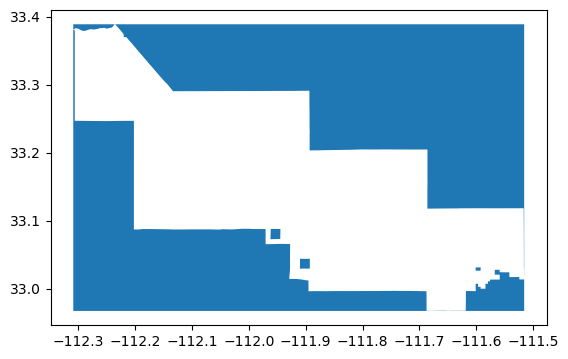

In [5]:
# Plot the area outside the GRIC but inside the envelope
out_gdf.plot()

Next, clip your DataArray to the boundaries for both inside and outside
the reservation. You will need to replace the `GeoDataFrame` name with
your own. Check out the [lesson on clipping data with the `rioxarray`
library in the
textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/crop-raster-data-with-shapefile-in-python/).

> **GOTCHA ALERT**
>
> It’s important to use `from_disk=True` when clipping large arrays like
> this. It allows the computer to use less valuable memory resources
> when clipping - you will probably find that otherwise the cell below
> crashes your kernel.

In [6]:
# Clip data to both inside and outside the boundary
ndvi_cp_da = ndvi_da.rio.clip(gric_gdf.geometry, from_disk=True)
ndvi_out_da = ndvi_da.rio.clip(out_gdf.geometry, from_disk=True)

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>For <strong>both inside and outside</strong> the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="3"></span> boundary:</p>
<ul>
<li>Group the data by year</li>
<li>Take the mean. You always need to tell reducing methods in
<code>xarray</code> what dimensions you want to reduce. When you want to
summarize data across <strong>all</strong> dimensions, you can use the
<code>...</code> syntax, e.g. <code>.mean(...)</code> as a
shorthand.</li>
<li>Select the NDVI variable</li>
<li>Convert to a DataFrame using the <code>to_dataframe()</code>
method</li>
<li>Join the two DataFrames for plotting using the <code>.join()</code>
method. You will need to rename the columns using the
<code>lsuffix=</code> and <code>rsuffix=</code> parameters</li>
</ul>
<p>Finally, plot annual July means for both inside and outside the
Reservation on the same plot.</p></div></div>

> **GOTCHA ALERT**
>
> The DateIndex in pandas is a little different from the Datetime
> Dimension in xarray. You will need to use the `.dt.year` syntax to
> access information about the year, not just `.year`.

In [7]:
# Compute mean annual July NDVI
jul_ndvi_cp_df = (
    ndvi_cp_da
    .groupby(ndvi_cp_da.date.dt.year)
    .mean(...)
    .NDVI.to_dataframe())
jul_ndvi_out_df = (
    ndvi_out_da
    .groupby(ndvi_out_da.date.dt.year)
    .mean(...)
    .NDVI.to_dataframe())

# Plot inside and outside the reservation
jul_ndvi_df = (
    jul_ndvi_cp_df[['NDVI']]
    .join(
        jul_ndvi_out_df[['NDVI']], 
        lsuffix=f' inside {site_name}', rsuffix=f' outside {site_name}')
)

jul_ndvi_df.hvplot(
    title=f'NDVI before and after the {site_name} {event}'
)

:NdOverlay   [Variable]
   :Curve   [year]   (value)

Now, take the difference between outside and inside the site boundary
and plot that. What do you observe? Don’t forget to write a headline and
description of your plot!

In [8]:
# Plot difference inside and outside the boundary
jul_ndvi_df['difference'] = (
    jul_ndvi_df[f'NDVI inside {site_name}']
    - jul_ndvi_df[f'NDVI outside {site_name}'])
jul_ndvi_df.difference.hvplot(
    title=f'Difference between NDVI within and outside the site_name'
)

:Curve   [year]   (difference)

YOUR HEADLINE AND DESCRIPTION HERE

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [9]:
%store out_gdf

Stored 'out_gdf' (GeoDataFrame)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!